# Predict the price 

### Import the Librabries

In [263]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pandas.core.reshape.pivot import pivot
import warnings
%matplotlib inline
sns.set()

In [4]:
df = pd.read_csv('C:/Users/priye/OneDrive/DOCS/Data Science/Datasets - R , Python & ML/ML Datasets/USA_Housing.csv')

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.shape

(5000, 7)

In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


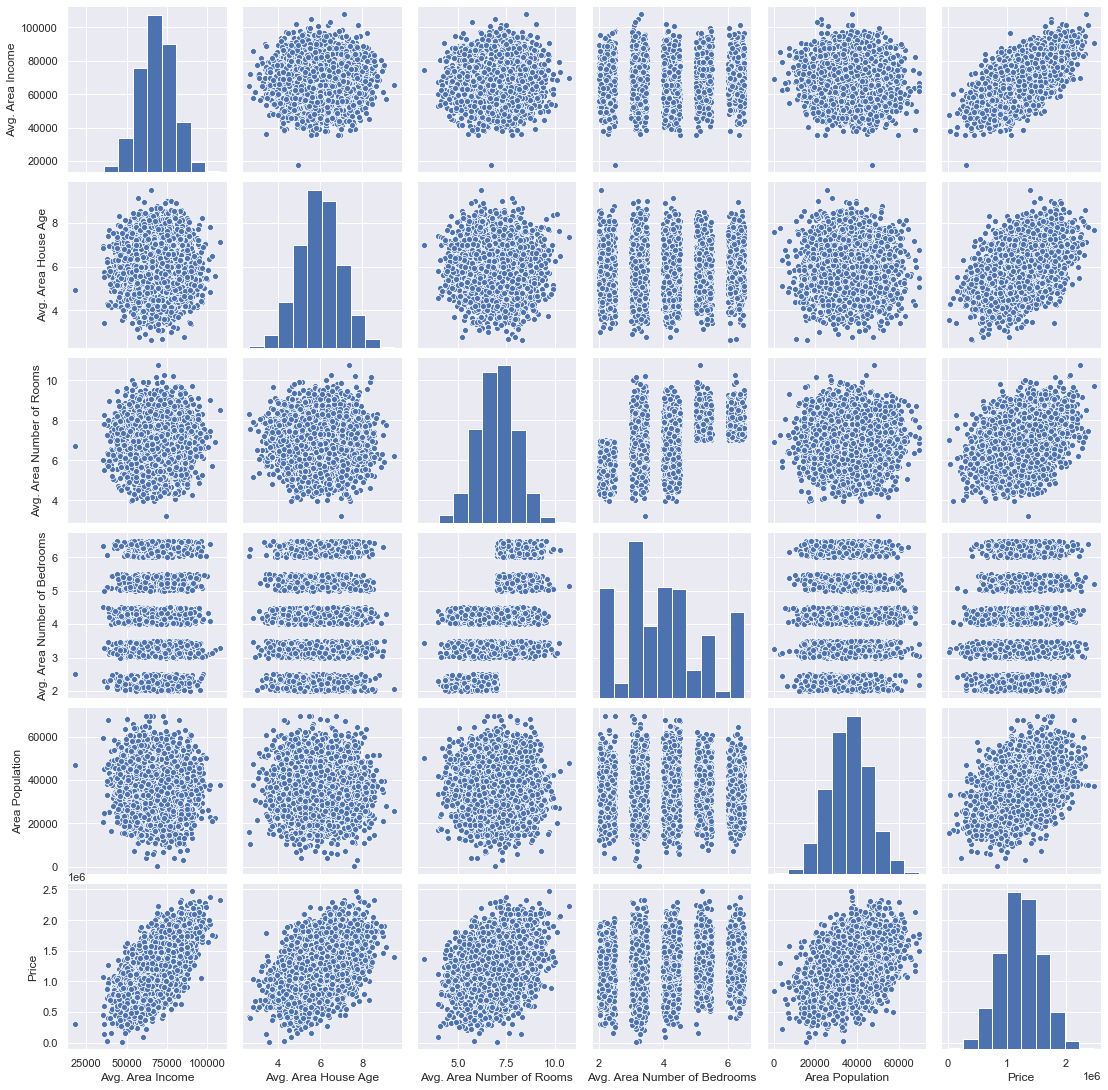

In [11]:
sns.pairplot(df);

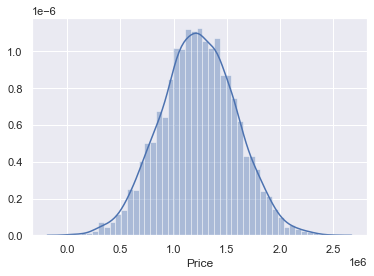

In [14]:
# Check the distribution of data
sns.distplot(df['Price']);

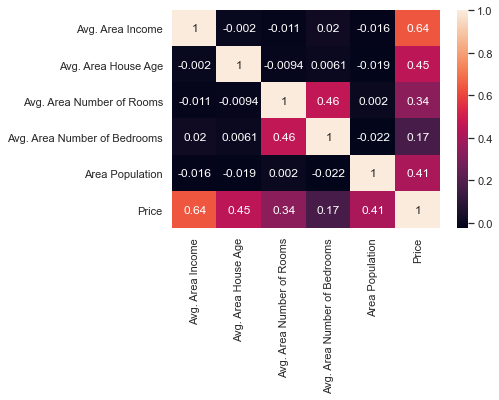

In [18]:
# check the correlation of the variables
sns.heatmap(df.corr(),annot=True);

In [19]:
# from the above correlation chart it can be seen that 'Avg. Area Number of Rooms' & 'Avg. Area Number of Bedrooms' are
# coorelated with a value of 0.46 so only one of the variable must be present in the model to avoid 'correlation'.

In [20]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Now do the regression using one of the method 'OLS' as shown below:

In [101]:
#x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population']]
#x.drop()

In [207]:
x1=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]


In [208]:
y=df[['Price']]

In [209]:
#results = sm.OLS(y,x).fit()

In [210]:
results1= sm.OLS(y,x1).fit()

In [211]:
#results.summary2()

In [212]:
results1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                    OLS                Adj. R-squared (uncentered):   0.964      
Dependent Variable:       Price              AIC:                           138166.7068
Date:                     2020-08-07 22:44   BIC:                           138199.2928
No. Observations:         5000               Log-Likelihood:                -69078.    
Df Model:                 5                  F-statistic:                   2.702e+04  
Df Residuals:             4995               Prob (F-statistic):            0.00       
R-squared (uncentered):   0.964              Scale:                         5.8627e+10 
---------------------------------------------------------------------------------------
                               Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
---------------------------------------------------------------------------------------
Avg. Area Income                10.2372    0.2686 38.1062 0.0000      9.7105    10.7639
Avg. Area House Age          51296.0687 2960.9165 17.3244 0.0000  45491.3724 57100.7650
Avg. Area Number of Rooms    -9614.4333 3262.9971 -2.9465 0.0032 -16011.3401 -3217.5265
Avg. Area Number of Bedrooms  4082.3129 3132.3329  1.3033 0.1925  -2058.4348 10223.0606
Area Population                  8.0918    0.3270 24.7448 0.0000      7.4507     8.7329
---------------------------------------------------------------------------------------
Omnibus:                     0.446                Durbin-Watson:                  1.983
Prob(Omnibus):               0.800                Jarque-Bera (JB):               0.490
Skew:                        -0.012               Prob(JB):                       0.783
Kurtosis:                    2.958                Condition No.:                  93031
=======================================================================================
* The condition number is large (9e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

## Do a Train-split test using SKLEARN

In [213]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.25,random_state=42)

In [214]:
lm = LinearRegression()


In [253]:
x_test.shape

(1250, 5)

In [254]:
y_test.shape

(1250, 1)

### Fit the model

In [215]:
reg = lm.fit(x_train,y_train)

### Lets check the coefficients

In [216]:
# to Print the intercept
print(lm.intercept_)

[-2633398.41856991]


In [217]:
#Return the coefficient of determination R^2 of the prediction.
reg.score(x_train,y_train) 

0.9183173381813661

In [218]:
lm.coef_

array([[2.16473495e+01, 1.65196273e+05, 1.19400961e+05, 2.08616775e+03,
        1.52111788e+01]])

In [219]:
coeff = pd.DataFrame(lm.coef_)

In [220]:
coeff

,0,1,2,3,4
0,21.64735,165196.273097,119400.960633,2086.167753,15.211179


In [221]:
coeff_table = coeff.melt(var_name="Drop this col",value_name='Coeff')

In [222]:
coeff_table.drop(columns=['Drop this col'],axis=1,inplace=True)

In [223]:
coeff_table

,Coeff
0,21.647350
1,165196.273097
2,119400.960633
3,2086.167753
4,15.211179


In [224]:
df_table = pd.DataFrame(x1.columns,columns=['Independent Variables'])

In [225]:
coeff_table_df = df_table.join(coeff_table,how='left')

In [226]:
coeff_table_df

,Independent Variables,Coeff
0,Avg. Area Income,21.647350
1,Avg. Area House Age,165196.273097
2,Avg. Area Number of Rooms,119400.960633
3,Avg. Area Number of Bedrooms,2086.167753
4,Area Population,15.211179


In [227]:
type(coeff_table_df)

pandas.core.frame.DataFrame

### Predictions using our model

In [241]:
predictions = lm.predict(x_test)

In [257]:
y_pred = predictions

In [258]:
predictions

array([[1308500.26571931],
       [1236863.17310185],
       [1244410.75078934],
       ...,
       [1261463.85964284],
       [1076336.42840195],
       [1258430.47866649]])

In [244]:
predictions.shape

(1250, 1)

In [250]:
y_test.shape

(1250, 1)

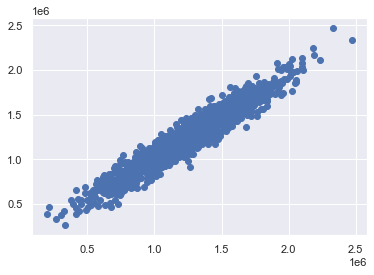

In [248]:
plt.scatter(y_test,predictions) # cant use seaborn here so use matplotlib

In [251]:
# plt.scatter(y_test,x_test) -- this wont work bcoz both are of different dimensions

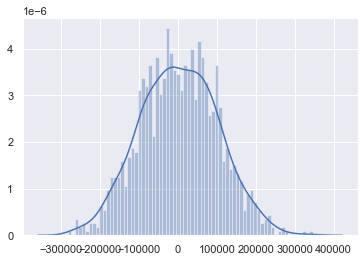

In [261]:
sns.distplot(y_test-y_pred,bins=70); # this will show the difference btw predicted y and test y

### Evaluate the model

In [266]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error 80859.62543687937
Mean Squared Error 9940956140.796724
Root Mean Squared Error 99704.34364056926
